# 로지스틱 선형회귀

In [ ]:
from sklearn import datasets
iris = datasets.load_iris() # sklearn의 빌트인 iris 예제 로드
print(list(iris.keys())) # iris데이터 key 값, 어떤 데이터가 있는지를 확인

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
x = iris['data'][:,3:] # 꽃잎의 너비 변수만 사용하겠다. x = iris['data'][:,3] 와 같은의미이다.
# 2차원 형태로 만들기 위해서 , 하나 더 찍어줬다.
y = (iris['target']==2).astype('int') # index=2 : Versinica 타겟 변수로 설정 나머지는 0으로 도출되게 한다.

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 선형회귀 모델
log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 새로운 데이터 0과 3 사이에서 1000개 의 데이터를 만들겠다. 2차원의 형태로
x_new = np.linspace(0,3,1000).reshape(-1, 1)

# predict VS predict_proba => predict: 예측 라벨값 산출, predict_proba: 예측 확률 값 산출
y_proba = log_reg.predict_proba(x_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

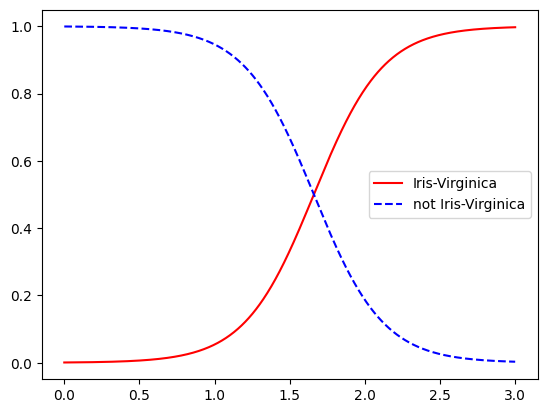

In [ ]:
# 오히려 개인적인 분석으로 오차를 줄일 수 있다.
plt.plot(x_new, y_proba[:,1], "r-", label = "Iris-Virginica")
plt.plot(x_new, y_proba[:,0], "b--", label = "not Iris-Virginica")
plt.legend()
plt.show()

In [ ]:
x = iris['data'][:,(2,3)] # 꽃잎의 길이, 너비 변수 사용
y = iris['target'] # 3개 클래스 모두 사용

In [ ]:
# multi class 역시 sklearn의 logisticregression 사용
# multi_class = 'multinomial'(다항 로지스틱 회귀) 옵션으로 소프트맥트 회귀를 사용할 수 있음
# solver = 'lbfgs'의 lbfgs는 의사 뉴턴 메서드 중, 제한된 메모리 공간에서 구현한 것으로 머신러닝 분야에서 많이 사용 됨
# 하이퍼파라미터 C를 통해, 이전 장에서 배운 L2 규제를 사용하게 됨
# L1규제는 손실함수에 가중치의 절댓값을 더하는 방법이다. 이 가중치의 절댓값을 L1 노름(norm)이라고 한다.
# L2 규제 - 손실함수에 가중치에 대한 L2 노름의 제곱을 더한다. 가중치 제한한다.
# 가중치의 크기가 직접 영향을 미치기 때문에 L2 규제가 L1 규제 보다 가중치 규제에 좀 더 효과적
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10,random_state=2021)
softmax_reg.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial', random_state=2021)

In [ ]:
# 꽃잎 길이 5cm, 너비 2cm의 iris 데이터를 예측한다고 가정
new_iris = [[5,2]]
prediction = softmax_reg.predict(new_iris)[0]
# 리스트 형식으로 바꿔준다.
label = iris['target_names'].tolist()

print(label[prediction])

# 모든 확률을 제공, 가장 큰 확률의 인덱스를 가져온다
softmax_reg.predict_proba(new_iris)

virginica


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
# SVM

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris() # 사이킷런 빌트인 iris 예제 데이터 로드
x = iris['data'][:,(2, 3)] # 꽃잎의 길이, 너비 변수 사용
y = (iris['target']==2).astype('int') # index = 2 : Versinica

# 사이킷런의 파이프라인 라이브러리를 통해서 데이터 스케일과 모델 적합을 한번에 할 수 있음.
# 파이브라인 - 배관 >>>> 한 번에 fit 진행시켜준다. 귀찮? x 사용한 전처리를 그대로 가져와서 사용할 수 있다.
# scaler, model 연결하기 때문에 재활용할 때 좋다고 한다.
svm_clf = Pipeline([
                    ('scaler',StandardScaler()),
                    # 데이터 전환... 테스트...
                    ('linear_svc',LinearSVC(C=1,loss='hinge')) # C = 규제항
])

In [2]:
# 모델 훈련
svm_clf.fit(x, y)

# 꽃잎 길이 5.5cm, 너비 1.7cm의 iris 데이터를 예측한다고 가정
new_iris = [[5.5, 1.7]] # 길이 : 5.5, 너비 : 1.7 로 설정
prediction = svm_clf.predict(new_iris)[0]
print(prediction) # 1 : Versinica : True(1)

1


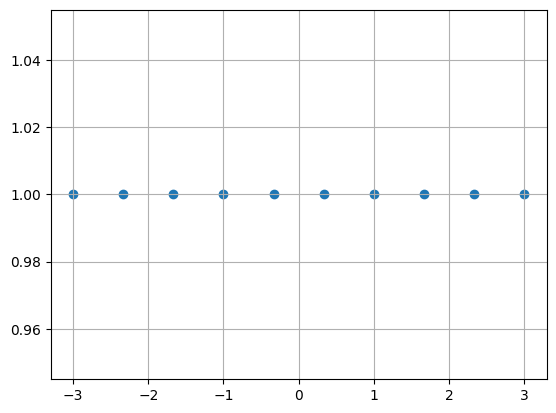

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(-3,3,10)
y = np.linspace(1,1,10)
plt.scatter(x,y)
plt.grid()
plt.show()

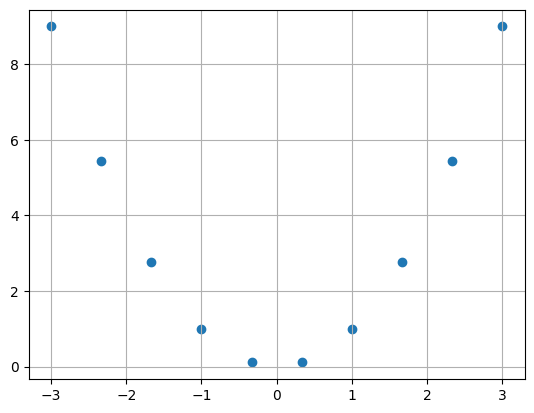

In [6]:
b_func = x**2
plt.scatter(x,b_func)
plt.grid()
plt.show()

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# 샘플 수 1000개, noise값 0.1, random_state=2021
x,y = make_moons(n_samples=1000,noise=0.1,random_state=2021)

In [8]:
# 변수변환 : polynomial 3차 다항식 사용, scaler : StandardScaler 사용, 모델 : LinearSVM(C=10,loss='hinge) 사용
polynomial_std_svm = Pipeline([
                               ("polynomial", PolynomialFeatures(degree=3)),
                               ("std", StandardScaler()),
                               ("svm", LinearSVC(C=10, loss = 'hinge'))
])

# 모델 학습
polynomial_std_svm.fit(x, y)

# 첫번째 변수값:2.0, 두번째 변수값:1.0 인 새로운 데이터 예측
new_moon = [[2.0,1.0]]
polynomial_std_svm.predict(new_moon)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([1])

In [ ]:
# 다항식 커널

In [9]:
from sklearn.svm import SVC
# kernel = 'poly(degree=3)'사용
# 매개변수 coef0(고차항의 영향을 줄일 수 있는지)는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절하는 것
# coef0을 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다. (coef0의 default=0)
poly_kernel_std_svm = Pipeline([
                            ("std", StandardScaler()),
                            ("poly_kernel_svm", SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_std_svm.fit(x, y)

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kernel_svm', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
# 가우시안 RBF 커널

In [10]:
# 하이퍼파라미터 r는 규제 역할을 한다.
# (모델이 과적합일 경우=> r 감소시키고, 모델 과소적합일 경우=> r 증가시켜야함)
# 하이퍼파라미터 C도 r(gamma)와 비슷한 성격을 띈다.
# 그래서 모델 복잡도를 조절하기 위해서 gamma와 C를 함께 조절해야 한다.
# Tip (하이퍼파라미터 조절) : 그리드 탐색법 사용(그리드 큰 폭 => 그리드 작은 폭) : 줄여가면서 탐색
rbf_kernel_std_svm = Pipeline([
                               ('std',StandardScaler()),
                               ('rbf_kernel_svm',SVC(kernel='rbf',gamma=3,C=0.001))
])
rbf_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=3))])